In [43]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from ISLP import load_data
std_scaler = StandardScaler()
hitters = load_data('Hitters')
numeric = hitters.select_dtypes(include='number').dropna().drop('Salary',axis=1)
scaled = std_scaler.fit_transform(numeric)

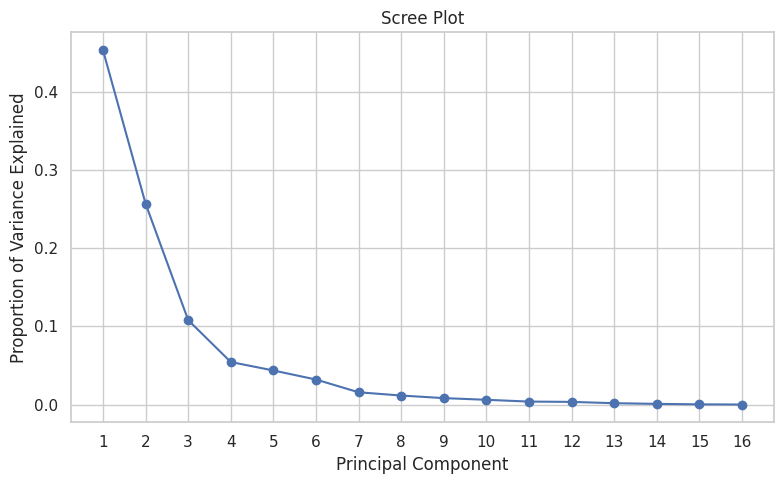

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("scree.png")

              PC1       PC2
AtBat    0.196209  0.391118
Hits     0.193644  0.383922
HmRun    0.201534  0.235943
Runs     0.195226  0.381179
RBI      0.232769  0.318169
Walks    0.208483  0.237312
Years    0.285183 -0.259716
CAtBat   0.333319 -0.186708
CHits    0.333577 -0.176440
CHmRun   0.320087 -0.124551
CRuns    0.340501 -0.167246
CRBI     0.342675 -0.163078
CWalks   0.319261 -0.187581
PutOuts  0.078227  0.163404
Assists -0.000531  0.176953
Errors  -0.007283  0.210699


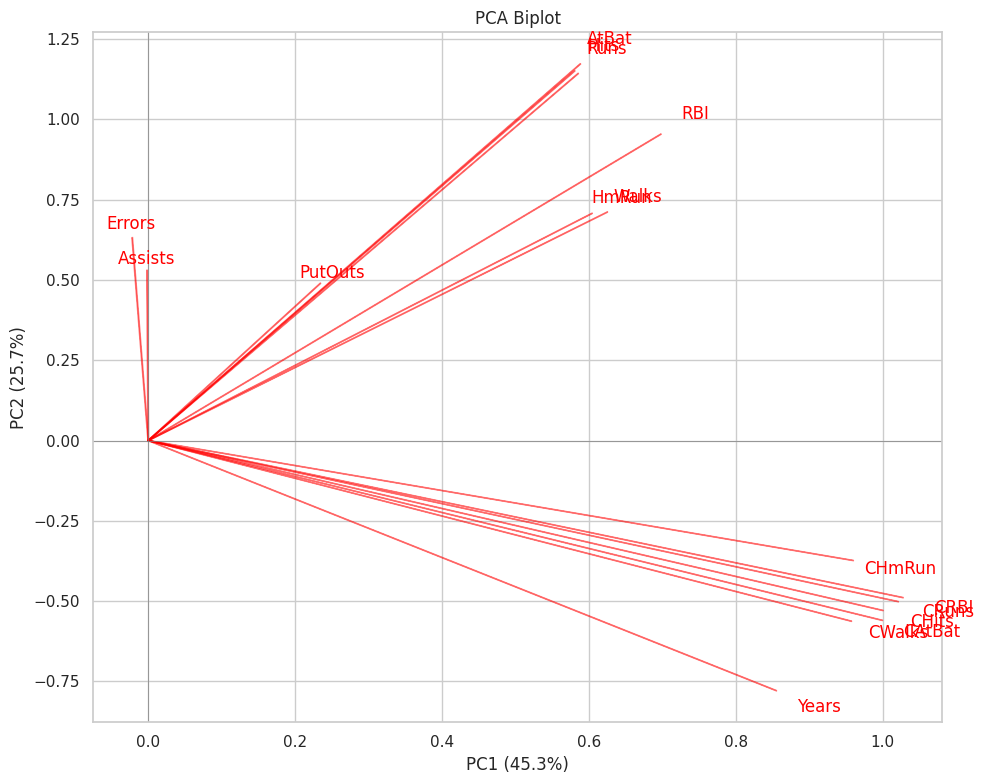

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=numeric.columns
)

print(loadings)
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

for i in range(loadings.shape[0]):
    plt.arrow(0, 0,
              loadings.iloc[i, 0]*3, 
              loadings.iloc[i, 1]*3,
              color='red', alpha=0.5, head_width=0.00)
    plt.text(loadings.iloc[i, 0]*3.2,
             loadings.iloc[i, 1]*3.2,
             loadings.index[i],
             color='red', ha='center', va='center')

explained_var = pca.explained_variance_ratio_ * 100
plt.xlabel(f"PC1 ({explained_var[0]:.1f}%)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}%)")
plt.title('PCA Biplot')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.savefig("biplot.png")

In [68]:
std_scaler = StandardScaler()
hitters = load_data('Hitters').dropna()
X = hitters.select_dtypes(include='number').drop('Salary',axis=1)
y = np.log10(hitters['Salary'])
X_scaled = std_scaler.fit_transform(numeric)

In [64]:
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data

Hitters = load_data('Hitters')
Hitters = Hitters.dropna().select_dtypes(include='number')
Hitters_encoded = pd.get_dummies(Hitters, drop_first=True)
X = Hitters_encoded.drop('Salary', axis=1)
y = np.log10(Hitters_encoded['Salary'])
X = sm.add_constant(X)
X = X.astype(float)
y = y.astype(float)
model = sm.OLS(y, X).fit()
print(model.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      Salary      & \textbf{  R-squared:         } &     0.543   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.513   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     18.25   \\
\textbf{Date:}             & Thu, 24 Apr 2025 & \textbf{  Prob (F-statistic):} &  2.47e-33   \\
\textbf{Time:}             &     17:18:48     & \textbf{  Log-Likelihood:    } &   -19.558   \\
\textbf{No. Observations:} &         263      & \textbf{  AIC:               } &     73.12   \\
\textbf{Df Residuals:}     &         246      & \textbf{  BIC:               } &     133.8   \\
\textbf{Df Model:}         &          16      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                 & \textbf{coef} & \tex

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
reg = LinearRegression()
loo = LeaveOneOut()
mse = -cross_val_score(reg, X, y, cv=loo, scoring='neg_mean_squared_error').mean()
print(mse)

0.08046436413595406


In [49]:
mse_scores = []
for m in tqdm(range(1, 17)):
    pcr = make_pipeline(StandardScaler(), PCA(n_components=m), LinearRegression())
    scores = cross_val_score(pcr, X, y, cv=loo, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    mse_scores.append(mse)

optimal = np.argmin(mse_scores) + 1
print(optimal)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:12<00:00,  1.24it/s]

13


NameError: name 'oprimal' is not defined

In [50]:
mse_scores[optimal - 1]

0.07857333806591552

In [22]:
from sklearn.cross_decomposition import PLSRegression
mse_scores = []
for m in tqdm(range(1, 17)):
    pls = PLSRegression(n_components=m)
    scores = cross_val_score(pls, X, y, cv=loo, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    mse_scores.append(mse)

optimal = np.argmin(mse_scores) + 1
print(optimal)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.78it/s]

10


In [51]:
mse_scores[optimal - 1]

0.07857333806591552

In [29]:
mse_scores = []
alphas = np.logspace(-3, 3, 100)
loo = LeaveOneOut()

for alpha in tqdm(alphas):
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    scores = cross_val_score(ridge, X, y, cv=loo, scoring='neg_mean_squared_error')
    mse_scores.append((-scores.mean(), alpha))

optimal = min(mse_scores)
print(f"Optimal alpha: {optimal[1]} with MSE: {optimal[0]}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.45it/s]

Optimal alpha: 13.219411484660288 with MSE: 0.07833066200612536


In [32]:
from sklearn.feature_selection import f_regression

f_stat, p_values = f_regression(X, y)

# Display p-values
for idx, p_val in enumerate(p_values):
    print(f"Feature {X.columns[idx]}: p-value = {p_val}")

Feature AtBat: p-value = 2.2815811014916775e-12
Feature Hits: p-value = 1.7240098390925338e-14
Feature HmRun: p-value = 1.5634274667755186e-08
Feature Runs: p-value = 5.388672077852747e-13
Feature RBI: p-value = 3.8508494076519316e-14
Feature Walks: p-value = 2.074589785640118e-13
Feature Years: p-value = 4.4302002570385124e-21
Feature CAtBat: p-value = 2.760961705660914e-28
Feature CHits: p-value = 2.56115358577072e-29
Feature CHmRun: p-value = 6.047792965248957e-20
Feature CRuns: p-value = 1.8893849725336009e-29
Feature CRBI: p-value = 2.1455847358934223e-27
Feature CWalks: p-value = 6.888619423584631e-22
Feature PutOuts: p-value = 0.00024245030818326684
Feature Assists: p-value = 0.4196621427695959
Feature Errors: p-value = 0.737490840445319


In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut, cross_val_score
from tqdm import tqdm
mse_scores = []
knot_range = range(3, 15)
X = X[["Hits"]]
for n in tqdm(knot_range):
    model = make_pipeline(
        SplineTransformer(degree=3, n_knots=n, include_bias=False),
        LinearRegression()
    ) 
    scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    mse_scores.append((mse, n))
    
optimal_mse, optimal_knots = min(mse_scores, key=lambda x: x[0])
print(optimal_knots)
print(optimal_mse)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.42it/s]

8
0.11588687249017016


/home/nimoor/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


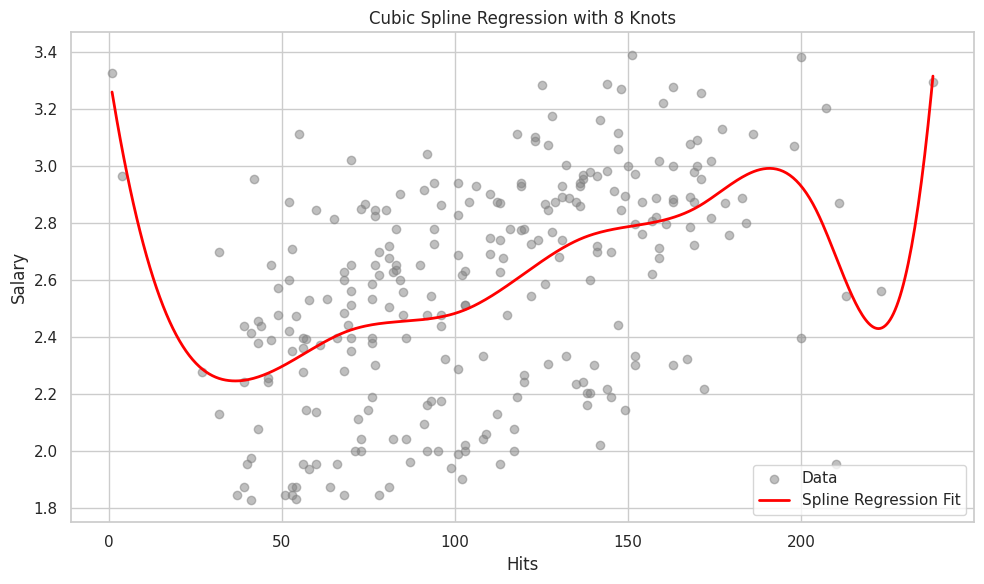

In [73]:
optimal_knots = 8  
model = make_pipeline(
    SplineTransformer(degree=3, n_knots=optimal_knots, include_bias=False),
    LinearRegression()
)
model.fit(X, y)
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Spline Regression Fit')
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.title(f'Cubic Spline Regression with {optimal_knots} Knots')
plt.legend()
plt.tight_layout()
plt.savefig("cubic.png")